In [1]:
import pandas as pd

In [2]:


# Load the dataset
file_path = 'diabetes.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Separate features and target variable
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Display initial setup
X_train.head(), y_train.head()


(     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 60             2       84              0              0        0   0.0   
 618            9      112             82             24        0  28.2   
 346            1      139             46             19       83  28.7   
 294            0      161             50              0        0  21.9   
 231            6      134             80             37      370  46.2   
 
      DiabetesPedigreeFunction  Age  
 60                      0.304   21  
 618                     1.282   50  
 346                     0.654   22  
 294                     0.254   65  
 231                     0.238   46  ,
 60     0
 618    1
 346    0
 294    0
 231    1
 Name: Outcome, dtype: int64)

In [ ]:
# RFE 

In [4]:
# Initialize RFE with the RandomForestClassifier estimator and the number of features to select set to half of total features initially
initial_num_features = len(X.columns) // 2
rfe = RFE(estimator=rf_classifier, n_features_to_select=initial_num_features)

# Fit RFE
rfe = rfe.fit(X_train, y_train)

# Get the ranking of features
featurerank = rfe.ranking_

# Get the columns that are considered most important
important_columns = X.columns[rfe.support_]

# Print the feature ranking and important columns
featurerank, important_columns.tolist()


(array([4, 1, 2, 5, 3, 1, 1, 1]),
 ['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [6]:
# Select the important features based on RFE
X_train_important = X_train[important_columns]
X_test_important = X_test[important_columns]

# Initialize and fit the Random Forest classifier using the important features
rf_classifier.fit(X_train_important, y_train)

# Predict the outcomes for the test set
y_pred = rf_classifier.predict(X_test_important)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.7532467532467533

In [ ]:
# The Random Forest classifier, when trained on the selected important features 
# (Glucose, BMI, DiabetesPedigreeFunction, and Age), achieves an accuracy of approximately 75.3275.32.

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Initialize classifiers
logistic_reg = LogisticRegression(random_state=42)
svm = SVC(probability=True, random_state=42)  # Enable probability to compute ROC AUC
random_forest = RandomForestClassifier(random_state=42)
naive_bayes = GaussianNB()

# List of classifiers and their names
classifiers = [(logistic_reg, 'Logistic Regression'), (svm, 'SVM'), (random_forest, 'Random Forest'), (naive_bayes, 'Naive Bayes')]

# Scoring metrics
scoring_metrics = {'accuracy': make_scorer(accuracy_score),
                   'precision': make_scorer(precision_score),
                   'recall': make_scorer(recall_score),
                   'f1_score': make_scorer(f1_score),
                   'roc_auc': make_scorer(roc_auc_score)}

# Dataframe to store the results
results_df = pd.DataFrame(columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])

# Perform k-fold cross-validation and evaluate metrics
# List to store the results
results_list = []

# Perform k-fold cross-validation and evaluate metrics
for clf, name in classifiers:
    # Perform 10-fold cross-validation
    scores = cross_validate(clf, X_test_important, y_test, cv=10, scoring=scoring_metrics)
    
    # Calculate mean scores
    mean_accuracy = np.mean(scores['test_accuracy'])
    mean_precision = np.mean(scores['test_precision'])
    mean_recall = np.mean(scores['test_recall'])
    mean_f1_score = np.mean(scores['test_f1_score'])
    mean_roc_auc = np.mean(scores['test_roc_auc'])
    
    # Append results to list
    results_list.append([name, mean_accuracy, mean_precision, mean_recall, mean_f1_score, mean_roc_auc])

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results_list, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])

# Show the results
results_df



Classifier  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.758750   0.721667  0.580000  0.624899  0.719444
1                  SVM  0.765833   0.731667  0.596667  0.641061  0.727778
2        Random Forest  0.741667   0.758810  0.520000  0.579655  0.695000
3          Naive Bayes  0.780000   0.732143  0.660000  0.682222  0.754444

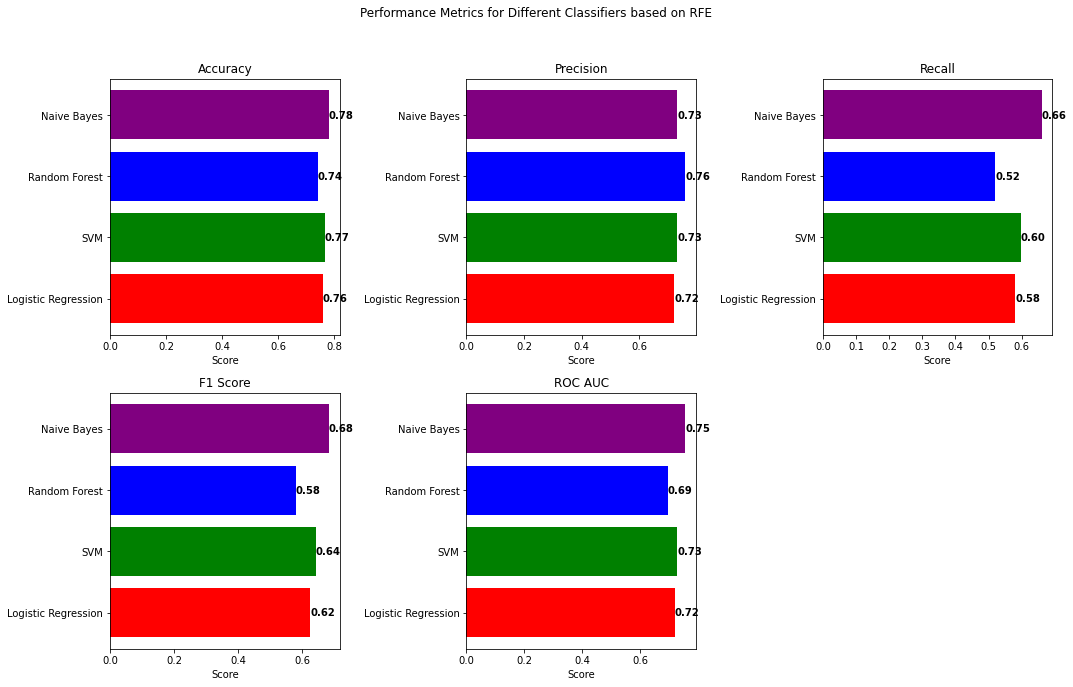

In [13]:
# Plotting the performance metrics for each classifier with colorful bars
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Performance Metrics for Different Classifiers based on RFE')

# Colors for bars
colors = ['red', 'green', 'blue', 'purple']

# List of metrics to plot
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']

# Generate bar plots
for ax, metric in zip(axes.flatten()[:-1], metrics_to_plot):
    ax.barh(results_df['Classifier'], results_df[metric], color=colors)
    ax.set_title(metric)
    ax.set_xlabel('Score')
    for i, v in enumerate(results_df[metric]):
        ax.text(v, i, f"{v:.2f}", color='black', va='center', fontweight='bold')

# Hide the last subplot
axes.flatten()[-1].axis('off')

# Show the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:
# All features 


In [14]:
# List to store the results for all features
results_all_features_list = []

# Perform k-fold cross-validation and evaluate metrics using all features
for clf, name in classifiers:
    # Perform 10-fold cross-validation
    scores = cross_validate(clf, X_test, y_test, cv=10, scoring=scoring_metrics)
    
    # Calculate mean scores
    mean_accuracy = np.mean(scores['test_accuracy'])
    mean_precision = np.mean(scores['test_precision'])
    mean_recall = np.mean(scores['test_recall'])
    mean_f1_score = np.mean(scores['test_f1_score'])
    mean_roc_auc = np.mean(scores['test_roc_auc'])
    
    # Append results to list
    results_all_features_list.append([name, mean_accuracy, mean_precision, mean_recall, mean_f1_score, mean_roc_auc])

# Convert the results list to a DataFrame
results_all_features_df = pd.DataFrame(results_all_features_list, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])

# Show the results
results_all_features_df


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Classifier  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.766250   0.726190  0.643333  0.651896  0.741111
1                  SVM  0.733750   0.688333  0.496667  0.558232  0.682778
2        Random Forest  0.741667   0.672143  0.573333  0.600831  0.706111
3          Naive Bayes  0.805417   0.735476  0.710000  0.717498  0.784444

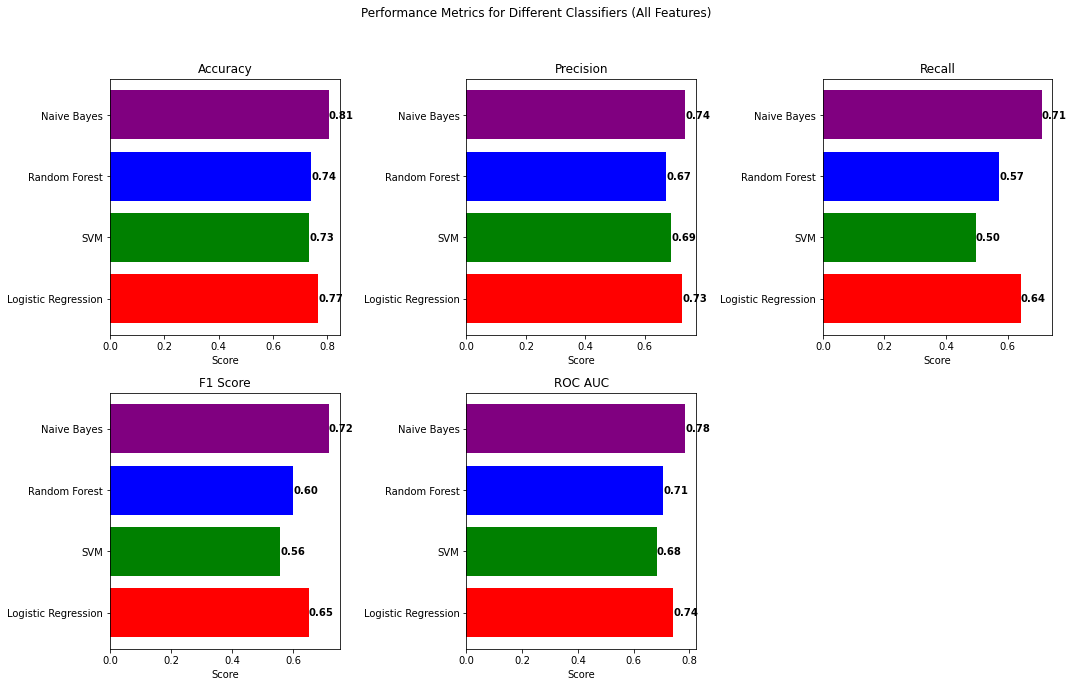

In [15]:
# Plotting the performance metrics for each classifier with colorful bars for all features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Performance Metrics for Different Classifiers (All Features)')

# Generate bar plots
for ax, metric in zip(axes.flatten()[:-1], metrics_to_plot):
    ax.barh(results_all_features_df['Classifier'], results_all_features_df[metric], color=colors)
    ax.set_title(metric)
    ax.set_xlabel('Score')
    for i, v in enumerate(results_all_features_df[metric]):
        ax.text(v, i, f"{v:.2f}", color='black', va='center', fontweight='bold')

# Hide the last subplot
axes.flatten()[-1].axis('off')

# Show the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:
# SFS 

In [16]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.naive_bayes import GaussianNB

# Initialize Naive Bayes classifier
naive_bayes = GaussianNB()

# Initialize Sequential Feature Selector object
sfs = SFS(naive_bayes, 
           k_features='best', 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=5)

# Perform SFS
sfs = sfs.fit(X, y)

# List of indices of the best features
best_feature_indices = list(sfs.k_feature_idx_)

# Names of the best features
best_features = X.columns[best_feature_indices]

best_features


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2023-09-05 17:33:58] Features: 1/8 -- score: 0.7487649605296663[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2023-09-05 17:33:58] Features: 2/8 -- score: 0.7591460826754944[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.0s finished

[2023-09-05 17:33:58] Features: 3/8 -- score: 0.7682200152788388[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'BMI',
       'DiabetesPedigreeFunction'],
      dtype='object')

In [18]:
# List to store the results for selected features
results_selected_features_list = []

# Perform k-fold cross-validation and evaluate metrics using selected features
for clf, name in classifiers:
    # Perform 10-fold cross-validation
    scores = cross_validate(clf, X_test_selected, y_test, cv=10, scoring=scoring_metrics)
    
    # Calculate mean scores
    mean_accuracy = np.mean(scores['test_accuracy'])
    mean_precision = np.mean(scores['test_precision'])
    mean_recall = np.mean(scores['test_recall'])
    mean_f1_score = np.mean(scores['test_f1_score'])
    mean_roc_auc = np.mean(scores['test_roc_auc'])
    
    # Append results to list
    results_selected_features_list.append([name, mean_accuracy, mean_precision, mean_recall, mean_f1_score, mean_roc_auc])

# Convert the results list to a DataFrame
results_selected_features_df = pd.DataFrame(results_selected_features_list, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])

# Show the results for selected features
results_selected_features_df


Classifier  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.819167   0.838929  0.656667  0.709210  0.783333
1                  SVM  0.772500   0.751667  0.600000  0.652273  0.735000
2        Random Forest  0.723333   0.660000  0.550000  0.590571  0.685000
3          Naive Bayes  0.812500   0.778571  0.696667  0.717599  0.788333

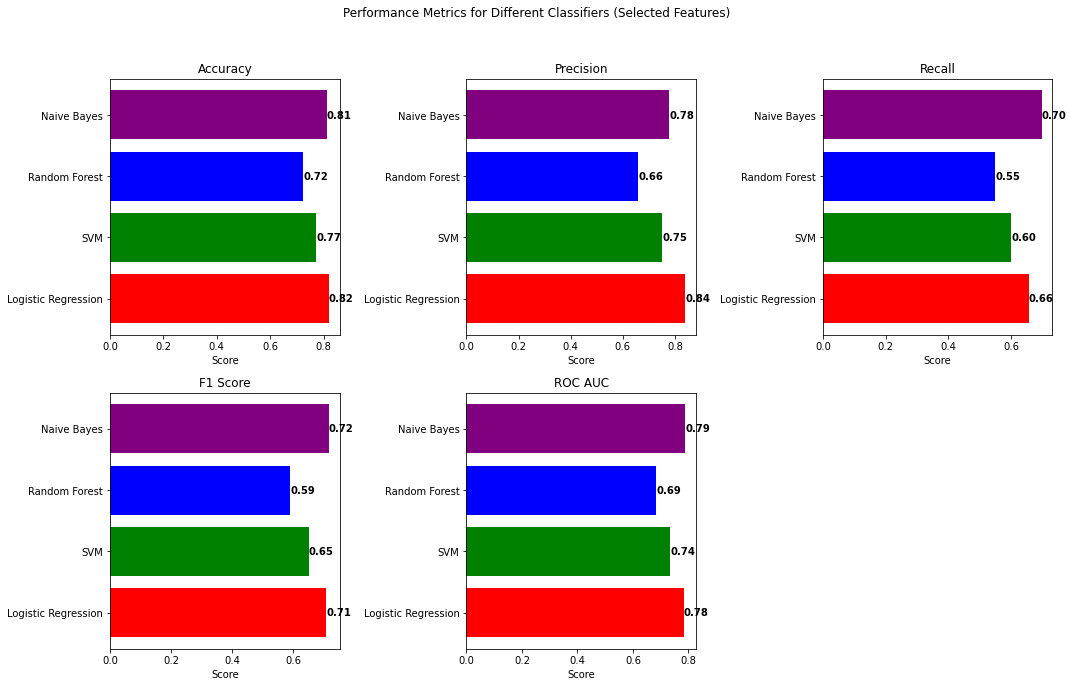

In [19]:
# Plotting the performance metrics for each classifier with colorful bars for selected features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Performance Metrics for Different Classifiers (Selected Features)')

# Generate bar plots
for ax, metric in zip(axes.flatten()[:-1], metrics_to_plot):
    ax.barh(results_selected_features_df['Classifier'], results_selected_features_df[metric], color=colors)
    ax.set_title(metric)
    ax.set_xlabel('Score')
    for i, v in enumerate(results_selected_features_df[metric]):
        ax.text(v, i, f"{v:.2f}", color='black', va='center', fontweight='bold')

# Hide the last subplot
axes.flatten()[-1].axis('off')

# Show the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:
# SBS  <Random forest 

In [20]:
# Initialize variables for backward feature selection using a different classifier (Random Forest)
best_features_backward_rf = list(X.columns)
current_score_backward_rf = 0.0

# Initialize Random Forest classifier for backward feature selection
rf_clf = RandomForestClassifier(random_state=42)

# Calculate initial score with all features
initial_scores_rf = cross_val_score(rf_clf, X, y, cv=5, scoring='accuracy')
initial_score_rf = initial_scores_rf.mean()

# Perform backward feature selection
while len(best_features_backward_rf) > 1:
    worst_score_rf = float('inf')
    worst_feature_rf = None
    for feature in best_features_backward_rf:
        # Test the current set of features without one
        test_features_rf = [f for f in best_features_backward_rf if f != feature]
        test_X_rf = X[test_features_rf]
        
        # Evaluate the classifier performance using cross-validation
        scores_rf = cross_val_score(rf_clf, test_X_rf, y, cv=5, scoring='accuracy')
        score_rf = scores_rf.mean()
        
        # Check if this set of features performs worse than the current best
        if score_rf < worst_score_rf:
            worst_score_rf = score_rf
            worst_feature_rf = feature
            
    # If removing a feature does not improve the performance, break the loop
    if worst_score_rf >= current_score_backward_rf:
        break

    # Update the current best features and score
    best_features_backward_rf.remove(worst_feature_rf)
    current_score_backward_rf = worst_score_rf

best_features_backward_rf, current_score_backward_rf


(['Pregnancies',
  'Glucose',
  'BloodPressure',
  'SkinThickness',
  'Insulin',
  'BMI',
  'DiabetesPedigreeFunction',
  'Age'],
 0.0)

In [21]:
# Selected features based on backward feature selection
selected_features_backward = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Filter the test data to include only the selected features
X_test_selected_backward = X_test[selected_features_backward]

# List to store the results for selected features using backward feature selection
results_selected_features_backward_list = []

# Perform k-fold cross-validation and evaluate metrics using selected features
for clf, name in classifiers:
    # Perform 10-fold cross-validation
    scores = cross_validate(clf, X_test_selected_backward, y_test, cv=10, scoring=scoring_metrics)
    
    # Calculate mean scores
    mean_accuracy = np.mean(scores['test_accuracy'])
    mean_precision = np.mean(scores['test_precision'])
    mean_recall = np.mean(scores['test_recall'])
    mean_f1_score = np.mean(scores['test_f1_score'])
    mean_roc_auc = np.mean(scores['test_roc_auc'])
    
    # Append results to list
    results_selected_features_backward_list.append([name, mean_accuracy, mean_precision, mean_recall, mean_f1_score, mean_roc_auc])

# Convert the results list to a DataFrame
results_selected_features_backward_df = pd.DataFrame(results_selected_features_backward_list, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])

# Show the results for selected features using backward feature selection
results_selected_features_backward_df


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Classifier  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.766250   0.726190  0.643333  0.651896  0.741111
1                  SVM  0.733750   0.688333  0.496667  0.558232  0.682778
2        Random Forest  0.741667   0.672143  0.573333  0.600831  0.706111
3          Naive Bayes  0.805417   0.735476  0.710000  0.717498  0.784444

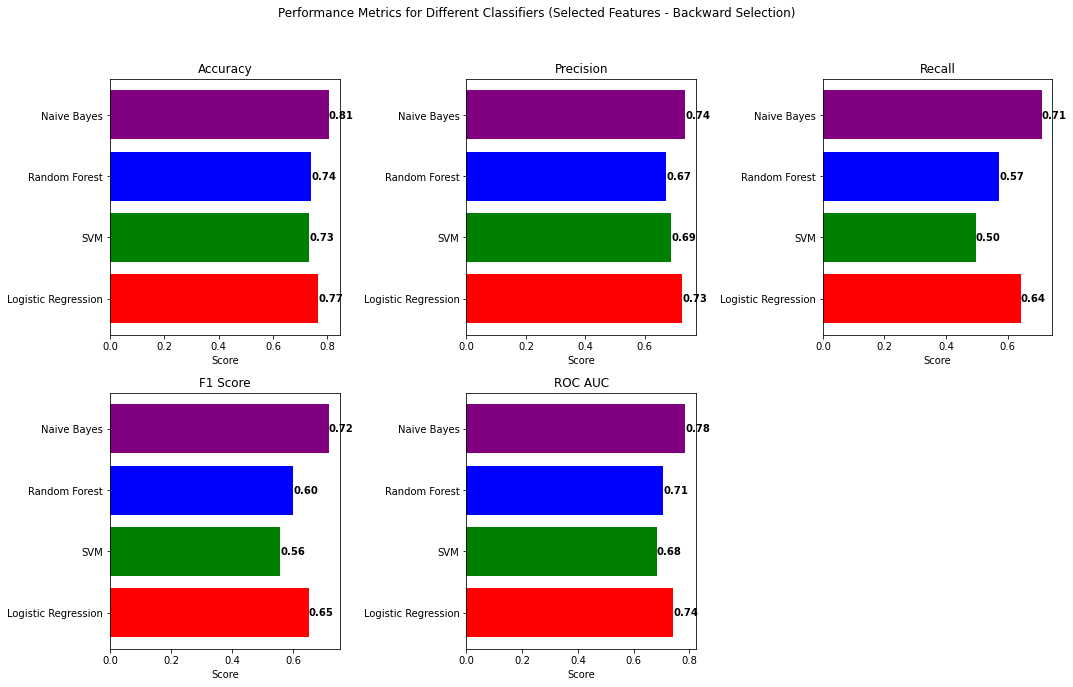

In [22]:
# Plotting the performance metrics for each classifier with colorful bars for selected features using backward feature selection
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Performance Metrics for Different Classifiers (Selected Features - Backward Selection)')

# Generate bar plots
for ax, metric in zip(axes.flatten()[:-1], metrics_to_plot):
    ax.barh(results_selected_features_backward_df['Classifier'], results_selected_features_backward_df[metric], color=colors)
    ax.set_title(metric)
    ax.set_xlabel('Score')
    for i, v in enumerate(results_selected_features_backward_df[metric]):
        ax.text(v, i, f"{v:.2f}", color='black', va='center', fontweight='bold')

# Hide the last subplot
axes.flatten()[-1].axis('off')

# Show the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
